In [35]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pathlib import Path


# Load datasets
file1 = Path("client_data (1).csv")
file2 = Path("price_data (1).csv")
client_data = pd.read_csv(file1)
price_data = pd.read_csv(file2)


print(f"Client data shape: {client_data.shape}")
print(f"Price data shape: {price_data.shape}")

Client data shape: (14606, 26)
Price data shape: (193002, 8)


In [48]:
print(f"Number of customers: {client_data.shape[0]:,}")
print(f"Number of features: {client_data.shape[1]}")
print(client_data.dtypes)
#defenitions of each column is at the bottom

Number of customers: 14,606
Number of features: 26
id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig          

In [37]:
# Price data overview
print(f"Number of records: {price_data.shape[0]:,}")
print(f"Number of unique customers: {price_data['id'].nunique():,}")
print(f"Number of unique dates: {price_data['price_date'].nunique()}")
print(f"Date range: {price_data['price_date'].min()} to {price_data['price_date'].max()}")

Number of records: 193,002
Number of unique customers: 16,096
Number of unique dates: 12
Date range: 2015-01-01 to 2015-12-01


In [38]:
# Convert 'MISSING' strings to actual NaN values

client_data['channel_sales'] = client_data['channel_sales'].replace('MISSING', np.nan)
client_data['origin_up'] = client_data['origin_up'].replace('MISSING', np.nan)

# Check for missing values in client data
missing_client = client_data.isnull().sum()
missing_pct = (missing_client / len(client_data) * 100).round(2)

missing_df = pd.DataFrame({'Missing_Count': missing_client,'Missing_Percentage': missing_pct})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
    print(f"\nTotal missing values: {missing_client.sum():,}")
    
#hannel_sales missing for 25.5% of customers!!

print("\nPRICE DATA MISSING VALUES")
missing_price = price_data.isnull().sum()
missing_price.sum()
#none

               Missing_Count  Missing_Percentage
channel_sales           3725               25.50
origin_up                 64                0.44

Total missing values: 3,789

PRICE DATA MISSING VALUES


0

CHURN DISTRIBUTION
Total customers: 14,606
Churned customers: 1,419 (9.72%)
Retained customers: 13,187 (90.28%)

Churn rate: 9.72%


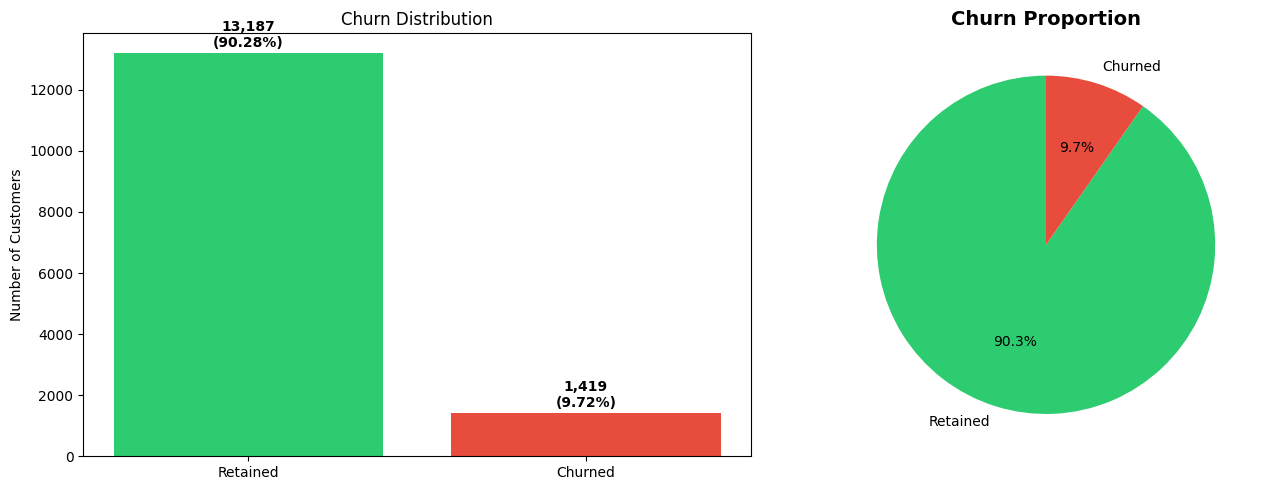

In [39]:
# Churn distribution
churn_counts = client_data['churn'].value_counts()
churn_pct = (churn_counts / len(client_data) * 100).round(2)

print("CHURN DISTRIBUTION")
print(f"Total customers: {len(client_data):,}")
print(f"Churned customers: {churn_counts[1]:,} ({churn_pct[1]}%)")
print(f"Retained customers: {churn_counts[0]:,} ({churn_pct[0]}%)")
print(f"\nChurn rate: {churn_pct[1]}%")

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(['Retained', 'Churned'], churn_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Churn Distribution')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 200, f'{v:,}\n({churn_pct.values[i]}%)', ha='center', fontweight='bold')

# Pie chart
axes[1].pie(churn_counts.values, labels=['Retained', 'Churned'], autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Churn Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()
#dataset looks a bit imbalanced this would require appropriate evauation metrics in modeling 


In [40]:
# Numeric features summary
client_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


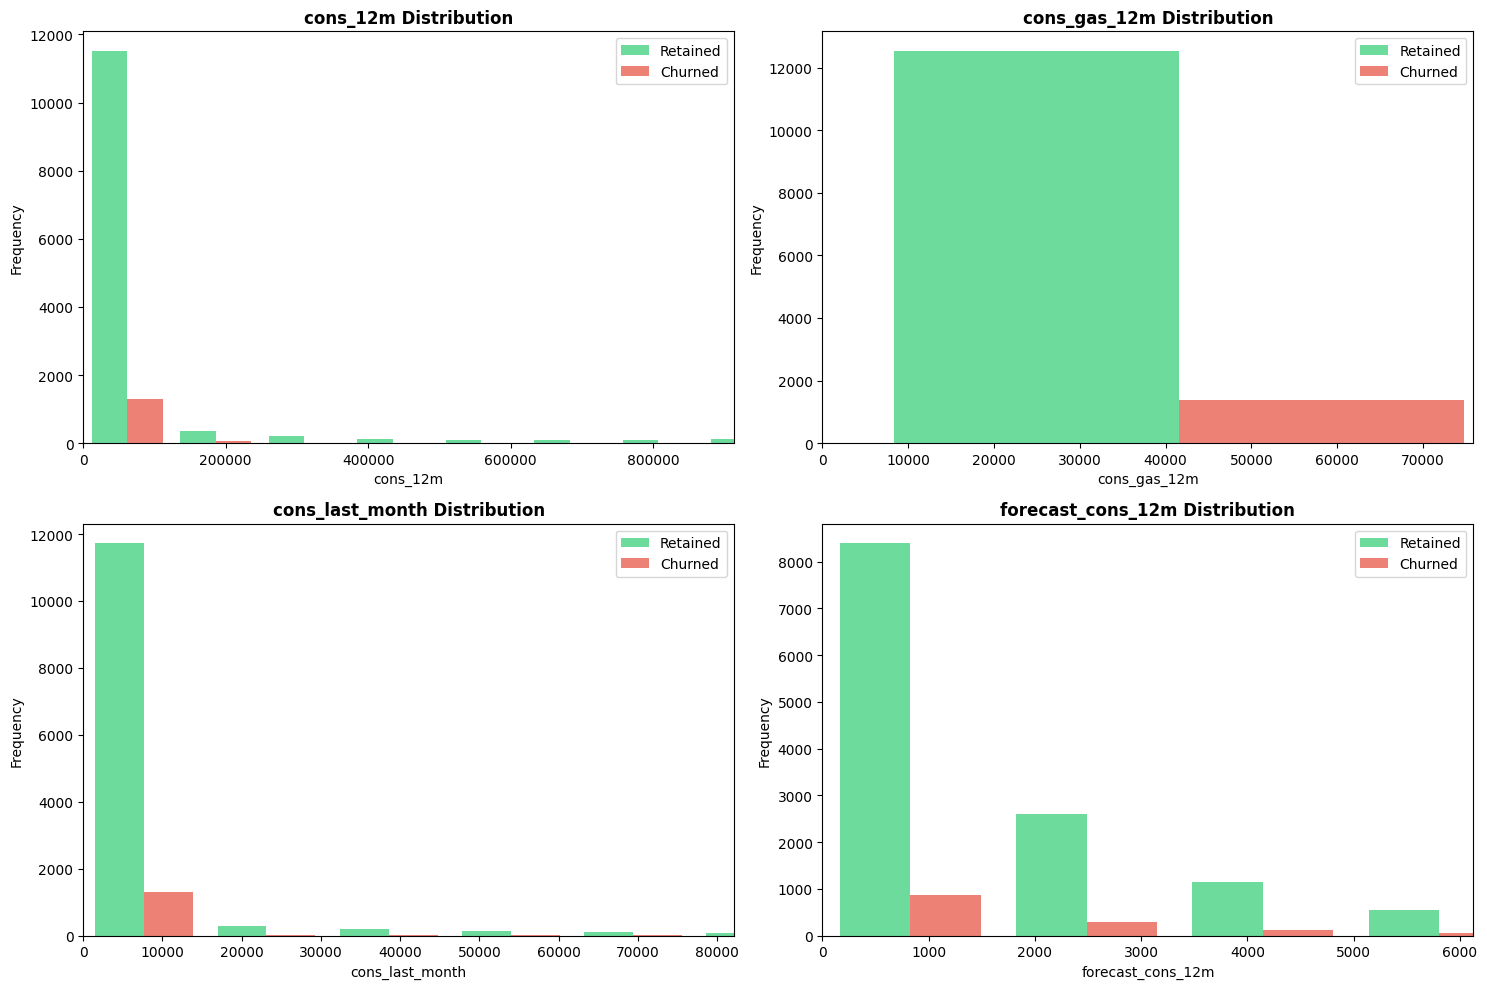


CONSUMPTION COMPARISON
cons_12m: Churned=78,862, Retained=167,867, Diff=-53.0%
cons_gas_12m: Churned=9,235, Retained=30,121, Diff=-69.3%
cons_last_month: Churned=7,205, Retained=17,046, Diff=-57.7%
forecast_cons_12m: Churned=1,963, Retained=1,858, Diff=+5.6%


In [41]:
# Consumption comparison
consumption_cols = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(consumption_cols):
    churned = client_data[client_data['churn'] == 1][col]
    retained = client_data[client_data['churn'] == 0][col]
    
    axes[i].hist([retained, churned], bins=50, label=['Retained', 'Churned'], color=['#2ecc71', '#e74c3c'], alpha=0.7)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{col} Distribution', fontweight='bold')
    axes[i].legend()
    axes[i].set_xlim(0, np.percentile(client_data[col], 95))

plt.tight_layout()
plt.show()

# Statistical comparison
print("\nCONSUMPTION COMPARISON")
for col in consumption_cols:
    mean_churned = client_data[client_data['churn'] == 1][col].mean()
    mean_retained = client_data[client_data['churn'] == 0][col].mean()
    diff_pct = ((mean_churned - mean_retained) / mean_retained * 100)
    print(f"{col}: Churned={mean_churned:,.0f}, Retained={mean_retained:,.0f}, Diff={diff_pct:+.1f}%")

/var/folders/m7/3b38xcb97vq1rhp8j68wynn80000gn/T/ipykernel_8833/358491049.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot([retained, churned], labels=['Retained', 'Churned'],patch_artist=True, showfliers=False)
/var/folders/m7/3b38xcb97vq1rhp8j68wynn80000gn/T/ipykernel_8833/358491049.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot([retained, churned], labels=['Retained', 'Churned'],patch_artist=True, showfliers=False)
/var/folders/m7/3b38xcb97vq1rhp8j68wynn80000gn/T/ipykernel_8833/358491049.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot([re

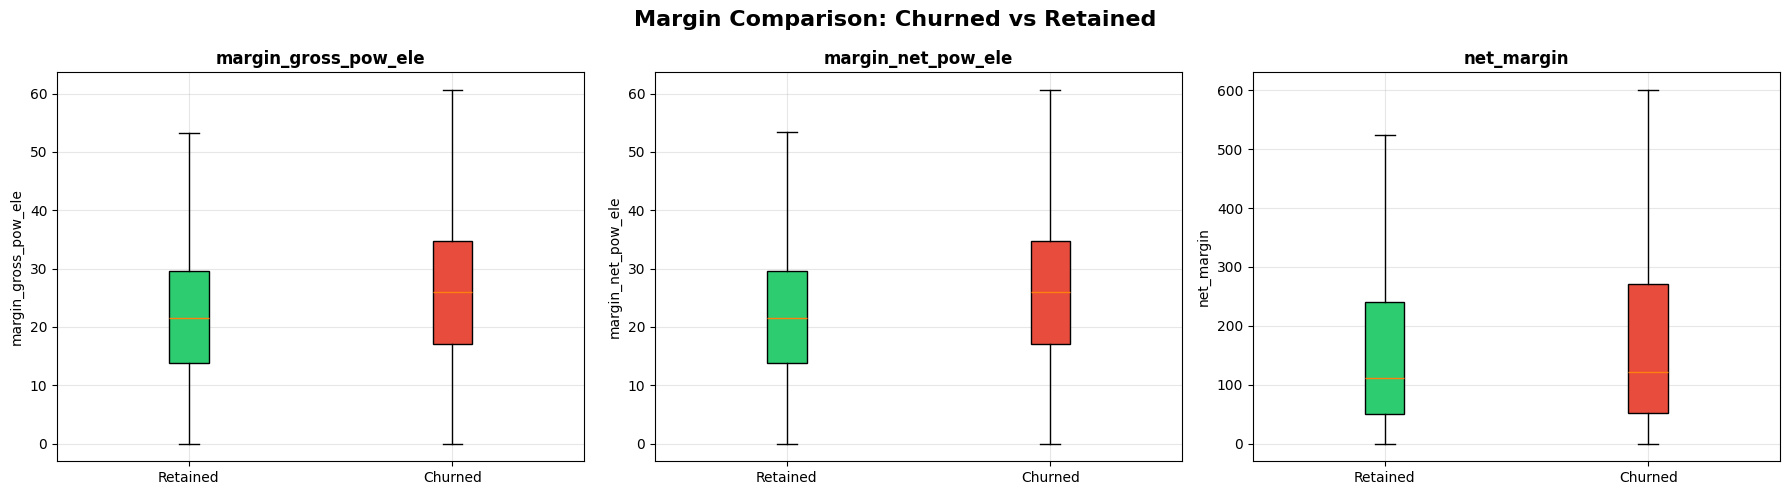

In [42]:
# Margin comparison
margin_cols = ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(margin_cols):
    churned = client_data[client_data['churn'] == 1][col]
    retained = client_data[client_data['churn'] == 0][col]
    
    bp = axes[i].boxplot([retained, churned], labels=['Retained', 'Churned'],patch_artist=True, showfliers=False)
    bp['boxes'][0].set_facecolor('#2ecc71')
    bp['boxes'][1].set_facecolor('#e74c3c')
    
    axes[i].set_ylabel(col)
    axes[i].set_title(f'{col}', fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Margin Comparison: Churned vs Retained', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [43]:
# Price statistics
print("PRICE DATA - DESCRIPTIVE STATISTICS")
price_cols = [col for col in price_data.columns if col.startswith('price_')]
price_data[price_cols].describe().T

PRICE DATA - DESCRIPTIVE STATISTICS


,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


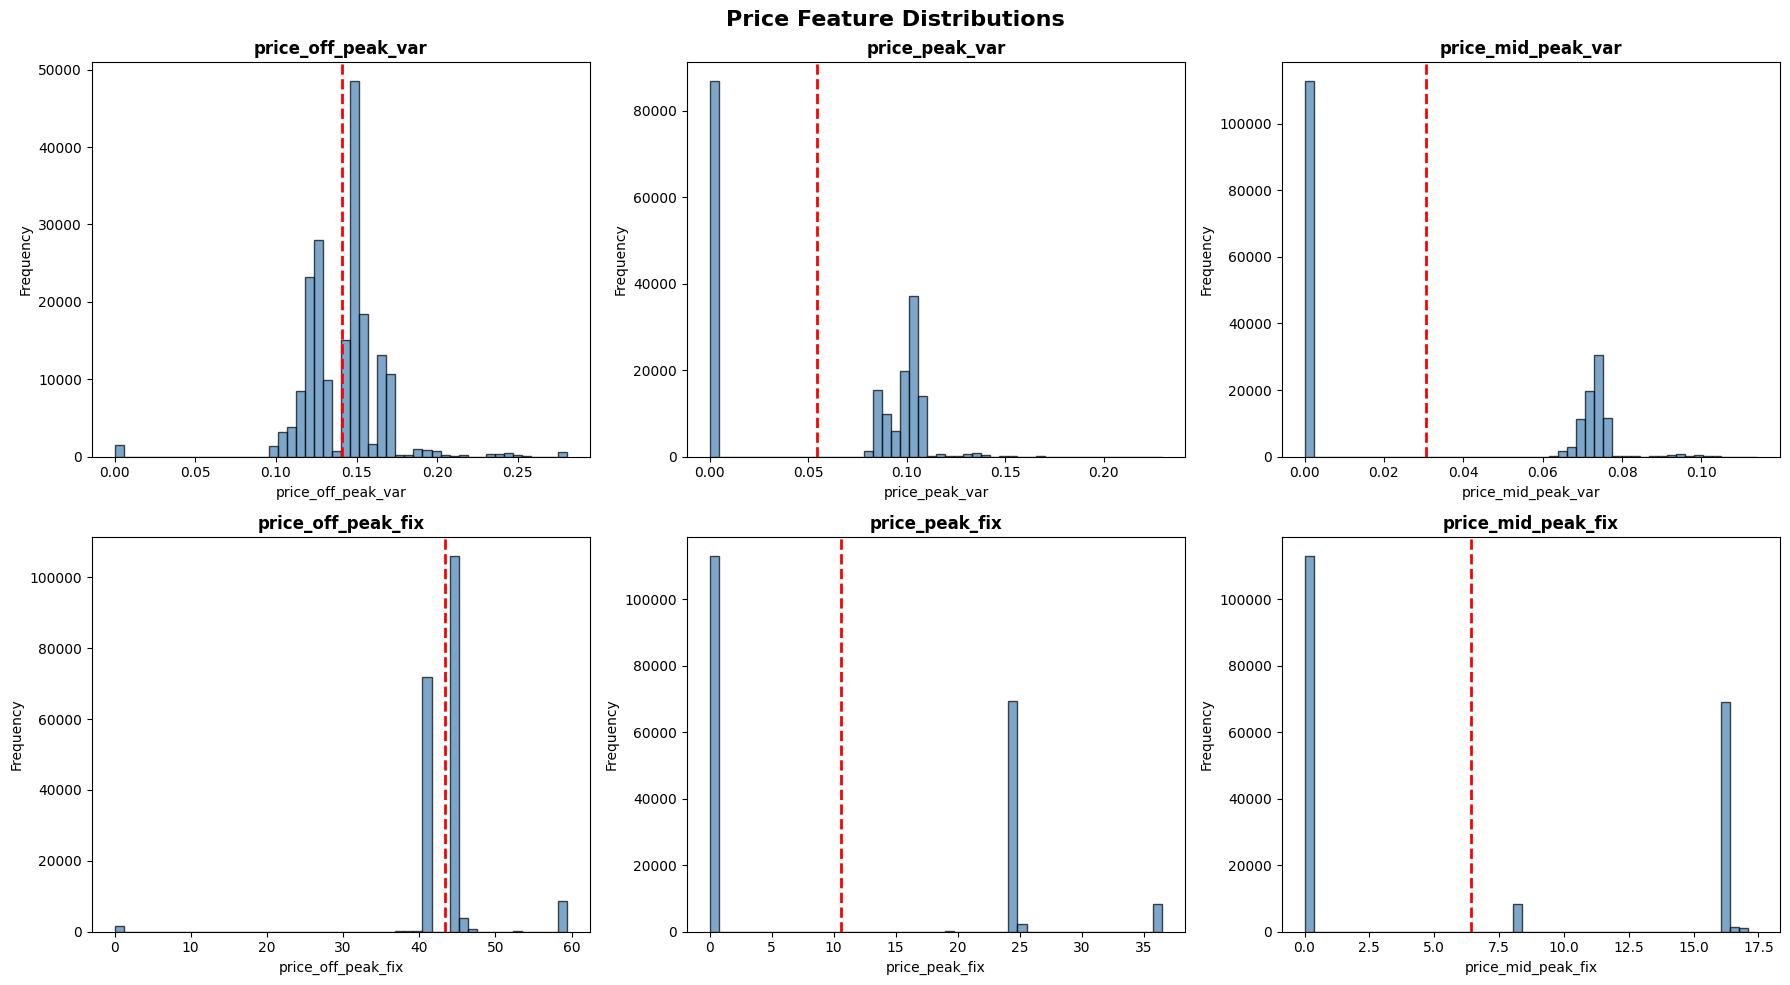

In [44]:
# Price distribution
price_cols = [col for col in price_data.columns if col.startswith('price_') and price_data[col].dtype in ['float64', 'int64']]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(price_cols):
    axes[i].hist(price_data[col], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{col}', fontweight='bold')
    axes[i].axvline(price_data[col].mean(), color='red', linestyle='--', linewidth=2)

plt.suptitle('Price Feature Distributions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

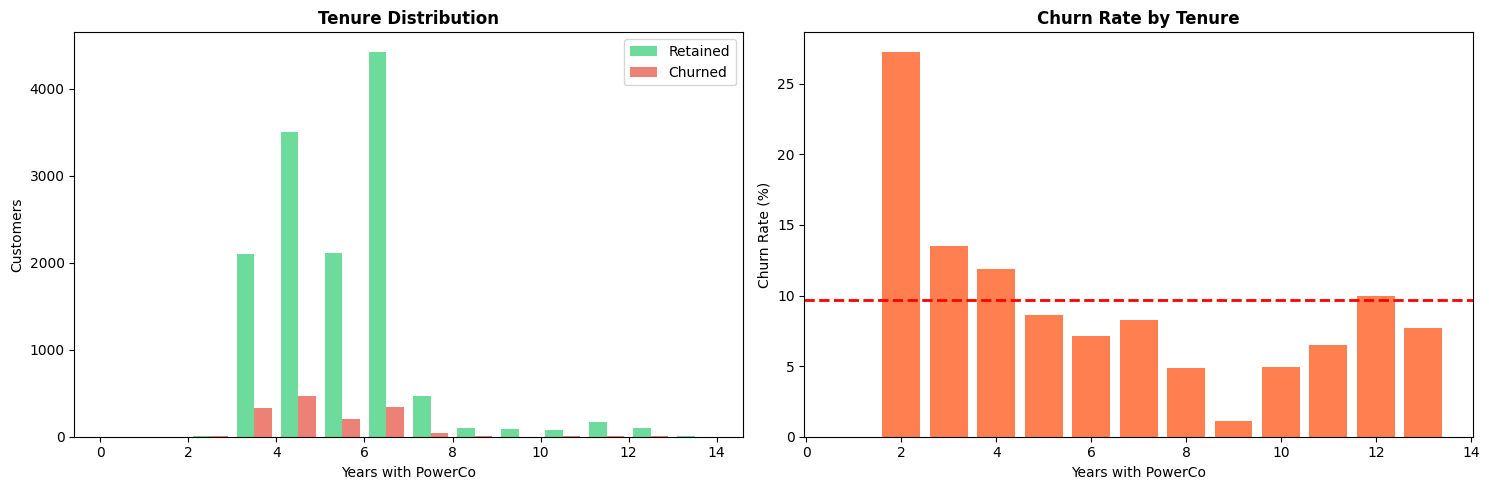

Avg tenure (churned): 4.63 years
Avg tenure (retained): 5.04 years


In [45]:
# Tenure analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution
churned_tenure = client_data[client_data['churn'] == 1]['num_years_antig']
retained_tenure = client_data[client_data['churn'] == 0]['num_years_antig']

axes[0].hist([retained_tenure, churned_tenure], bins=range(0, 15), label=['Retained', 'Churned'], 
             color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0].set_xlabel('Years with PowerCo')
axes[0].set_ylabel('Customers')
axes[0].set_title('Tenure Distribution', fontweight='bold')
axes[0].legend()

# Churn rate by tenure
churn_by_tenure = client_data.groupby('num_years_antig')['churn'].mean() * 100
axes[1].bar(churn_by_tenure.index, churn_by_tenure.values, color='coral')
axes[1].axhline(client_data['churn'].mean() * 100, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Years with PowerCo')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_title('Churn Rate by Tenure', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Avg tenure (churned): {churned_tenure.mean():.2f} years")
print(f"Avg tenure (retained): {retained_tenure.mean():.2f} years")

CORRELATION WITH CHURN
margin_net_pow_ele                0.095772
margin_gross_pow_ele              0.095725
forecast_meter_rent_12m           0.044245
net_margin                        0.041135
pow_max                           0.030362
forecast_price_energy_peak        0.029315
forecast_discount_energy          0.017026
forecast_price_pow_off_peak       0.014778
forecast_cons_12m                 0.012949
imp_cons                         -0.001583
forecast_cons_year               -0.002558
forecast_price_energy_off_peak   -0.010837
nb_prod_act                      -0.014930
cons_gas_12m                     -0.037957
cons_last_month                  -0.045284
cons_12m                         -0.045968
num_years_antig                  -0.074140
Name: churn, dtype: float64


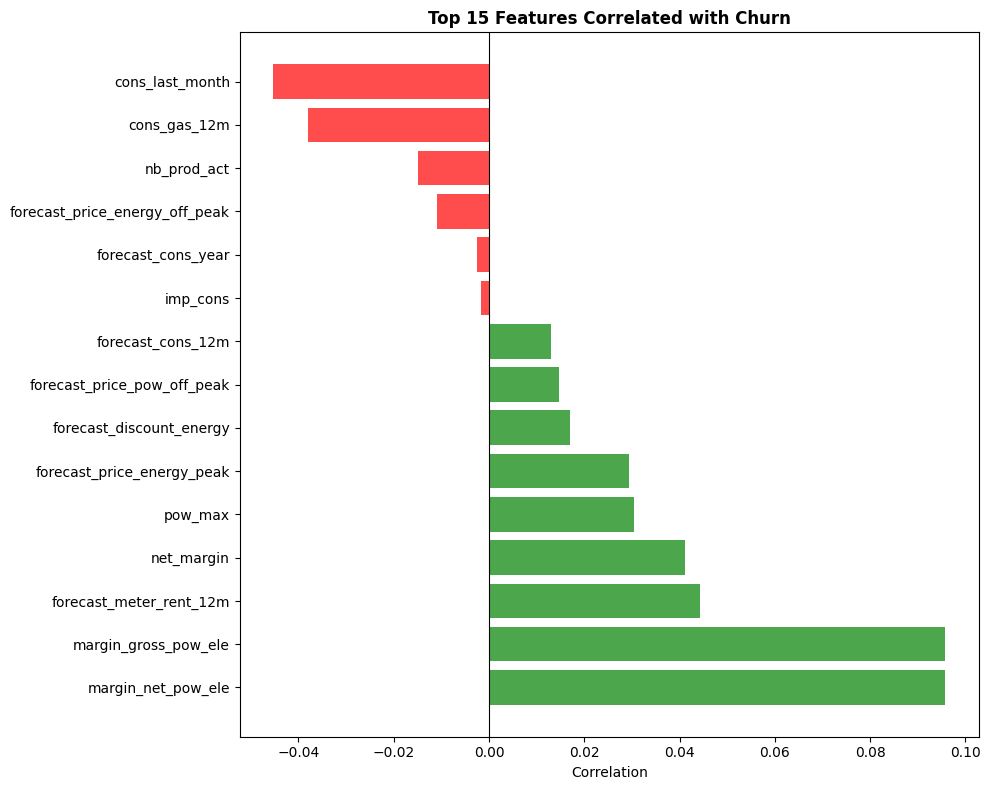

In [46]:
# Correlation with churn
numeric_features = client_data.select_dtypes(include=[np.number]).columns.tolist()
correlations = client_data[numeric_features].corr()['churn'].sort_values(ascending=False)

print("CORRELATION WITH CHURN")
print(correlations[correlations.index != 'churn'])

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))
top_corr = correlations[correlations.index != 'churn'].head(15)
colors = ['red' if x < 0 else 'green' for x in top_corr.values]
ax.barh(range(len(top_corr)), top_corr.values, color=colors, alpha=0.7)
ax.set_yticks(range(len(top_corr)))
ax.set_yticklabels(top_corr.index)
ax.set_xlabel('Correlation')
ax.set_title('Top 15 Features Correlated with Churn', fontweight='bold')
ax.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

In [47]:
print("KEY FINDINGS")

print("\n1. CHURN OVERVIEW:")
print(f"   Overall churn rate: {client_data['churn'].mean()*100:.2f}%")
print(f"   Imbalanced dataset: 90.3% retained vs 9.7% churned")

print("\n2. DATA QUALITY:")
print(f"   Missing values: 3,789 total (1.0% of all data points)")
print(f"     - channel_sales: 3,725 (25.5%)")
print(f"     - origin_up: 64 (0.4%)")
print(f"   14,606 customers with 26 features")
print(f"   Price data: No missing values, covers 12 months (2015)")

print("\n3. PRICE SENSITIVITY INDICATORS:")
price_features = ['forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak']
for feat in price_features:
    if feat in correlations.index:
        print(f"   {feat}: {correlations[feat]:.3f}")

print("\n4. STRONGEST PREDICTORS:")
top_5 = correlations[correlations.index != 'churn'].abs().sort_values(ascending=False).head(5)
for i, (feat, val) in enumerate(top_5.items(), 1):
    print(f"   {i}. {feat}: {correlations[feat]:.3f}")

print("\n","SOME CONCLUSION")
print("""
Price correlations with churn are WEAK (< 0.15), suggesting price sensitivity
may NOT be the primary churn driver. 

EVIDENCE:
All price features show weak correlations with churn
Non-price factors (tenure, consumption, margins) show stronger relationships
This preliminary finding challenges the hypothesis
""")


KEY FINDINGS

1. CHURN OVERVIEW:
   Overall churn rate: 9.72%
   Imbalanced dataset: 90.3% retained vs 9.7% churned

2. DATA QUALITY:
   Missing values: 3,789 total (1.0% of all data points)
     - channel_sales: 3,725 (25.5%)
     - origin_up: 64 (0.4%)
   14,606 customers with 26 features
   Price data: No missing values, covers 12 months (2015)

3. PRICE SENSITIVITY INDICATORS:
   forecast_price_energy_off_peak: -0.011
   forecast_price_energy_peak: 0.029
   forecast_price_pow_off_peak: 0.015

4. STRONGEST PREDICTORS:
   1. margin_net_pow_ele: 0.096
   2. margin_gross_pow_ele: 0.096
   3. num_years_antig: -0.074
   4. cons_12m: -0.046
   5. cons_last_month: -0.045

 SOME CONCLUSION

Price correlations with churn are WEAK (< 0.15), suggesting price sensitivity
may NOT be the primary churn driver. 

EVIDENCE:
All price features show weak correlations with churn
Non-price factors (tenure, consumption, margins) show stronger relationships
This preliminary finding challenges the hypothes

In [ ]:
##COLUMNS DEFENITIONS

In [49]:
""" Client_data.csv
● id = client company identifier
● activity_new = category of the company’s activity
● channel_sales = code of the sales channel
● cons_12m = electricity consumption of the past 12 months
● cons_gas_12m = gas consumption of the past 12 months
● cons_last_month = electricity consumption of the last month
● date_activ = date of activation of the contract
● date_end = registered date of the end of the contract
● date_modif_prod = date of the last modification of the product
● date_renewal = date of the next contract renewal
● forecast_cons_12m = forecasted electricity consumption for next 12 months
● forecast_cons_year = forecasted electricity consumption for the next calendar year
● forecast_discount_energy = forecasted value of current discount
● forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
● forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
● forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
● forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
● has_gas = indicated if client is also a gas client
● imp_cons = current paid consumption
● margin_gross_pow_ele = gross margin on power subscription
● margin_net_pow_ele = net margin on power subscription
● nb_prod_act = number of active products and services
● net_margin = total net margin
● num_years_antig = antiquity of the client (in number of years)
● origin_up = code of the electricity campaign the customer first subscribed to
● pow_max = subscribed power
● churn = has the client churned over the next 3 months
price_data.csv
● id = client company identifier
● price_date = reference date
● price_off_peak_var = price of energy for the 1st period (off peak)
● price_peak_var = price of energy for the 2nd period (peak)
● price_mid_peak_var = price of energy for the 3rd period (mid peak)
● price_off_peak_fix = price of power for the 1st period (off peak)
● price_peak_fix = price of power for the 2nd period (peak)
● price_mid_peak_fix = price of power for the 3rd period (mid peak)"""

' Client_data.csv\n● id = client company identifier\n● activity_new = category of the company’s activity\n● channel_sales = code of the sales channel\n● cons_12m = electricity consumption of the past 12 months\n● cons_gas_12m = gas consumption of the past 12 months\n● cons_last_month = electricity consumption of the last month\n● date_activ = date of activation of the contract\n● date_end = registered date of the end of the contract\n● date_modif_prod = date of the last modification of the product\n● date_renewal = date of the next contract renewal\n● forecast_cons_12m = forecasted electricity consumption for next 12 months\n● forecast_cons_year = forecasted electricity consumption for the next calendar year\n● forecast_discount_energy = forecasted value of current discount\n● forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months\n● forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)\n● forecast_price_energy_peak = forecasted ene